### Importy bibliotek

In [2]:
import json
import string
import os
# import morfeusz2
import pandas as pd
import itertools as it
import operator as op
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


1. Utworzenie korpusu dokumentów

In [3]:
corpus_dir = "./literatura"
corpus = PlaintextCorpusReader(corpus_dir, ".*\.txt")
files = corpus.fileids()
files

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/p8/1twr6ryj1n9d7dwhqdq2hpmm0000gn/T/ipykernel_42480/3713825801.py:2: SyntaxWarning: invalid escape sequence '\.'
  corpus = PlaintextCorpusReader(corpus_dir, ".*\.txt")


['Harry Potter i Czara Ognia.txt',
 'Harry Potter i Insygnia Smierci.txt',
 'Harry Potter i Kamien Filozoficzny.txt',
 'Harry Potter i Komnata Tajemnic.txt',
 'Harry Potter i Ksiaze Polkrwi.txt',
 'Harry Potter i Przeklete Dziecko.txt',
 'Harry Potter i Wiezien Azkabanu.txt',
 'Harry Potter i Zakon Feniksa.txt',
 'Opowiesci z Narni. Kon i jego chlopiec.txt',
 'Opowiesci z Narni. Ksiaze Kaspian.txt',
 'Opowiesci z Narni. Lew, czarownica i stara szafa.txt',
 'Opowiesci z Narni. Ostatnia bitwa.txt',
 'Opowiesci z Narni. Podroz Wedrowca do Switu.txt',
 'Opowiesci z Narni. Siostrzeniec Czarodzieja.txt',
 'Opowiesci z Narni. Srebrne krzeslo.txt',
 'Zmierzch.Ksiezyc w Nowiu.txt',
 'Zmierzch.Przed Switem.txt',
 'Zmierzch.Zacmienie.txt',
 'Zmierzch.Zmierzch.txt',
 'Zmierzch.Zycie i Smierc.txt']

2. Wstępne przygotowanie dokumentów

In [4]:
documents = {}
for f in files:
    documents[f] = corpus.raw(f)
print(json.dumps(documents, indent=4, ensure_ascii=False))

{
    "Harry Potter i Czara Ognia.txt": "Lord Voldemort, wraz ze swoim sługą Glizdogonem przybywa do domu należącego niegdyś do rodziny Riddle'ów położonego w Little Hangleton. Tam układają plan dotyczący zamordowania Harry'ego Pottera, co ma pomóc Czarnemu Panu w odzyskaniu jego dawnej mocy. Jest także mowa o wiernym słudze Czarnego Pana, który wkrótce ma znaleźć się w Hogwarcie. Wszystko to słyszy mieszkający nieopodal ogrodnik, Frank Bryce. Voldemort odkrywając, iż mężczyzna podsłuchuje, zaprasza go do środka i uśmierca. Harry budzi się z przerażającego snu. Jego blizna pulsuje okropnym bólem. Próbuje sobie przypomnieć o czym śnił, a z pamięci wyłania się obraz mrocznego pokoju, węża leżącego przed kominkiem oraz Glizdogona i Lorda Voldemorta planujących morderstwo. Harry zastanawia się czy powinien komuś powiedzieć o problemach z blizną, ponieważ, gdy bolała go ostatnim razem, Voldemort wdarł się do Hogwartu. Ostatecznie postanawia napisać do Syriusza i zejść na śniadanie. W trakci

In [5]:
stoplist_file = open("./stopwords_pl.txt", "r", encoding="UTF-8")
stoplist = stoplist_file.read().splitlines()
stoplist_file.close()
stoplist[4:]
stoplist

['# This file was created from the carrot2 project and is distributed under the BSD license.',
 '# See http://project.carrot2.org/license.html',
 '# Also see http://www.opensource.org/licenses/bsd-license.html',
 '# From trunk/core/carrot2-util-text/src-resources/stopwords.pl',
 'vol',
 'o.o.',
 'mgr',
 'godz',
 'zł',
 'www',
 'pl',
 'ul',
 'tel',
 'hab',
 'prof',
 'inż',
 'dr',
 'i',
 'u',
 'aby',
 'albo',
 'ale',
 'ani',
 'aż',
 'bardzo',
 'bez',
 'bo',
 'bowiem',
 'by',
 'byli',
 'bym',
 'był',
 'była',
 'było',
 'były',
 'być',
 'będzie',
 'będą',
 'chce',
 'choć',
 'co',
 'coraz',
 'coś',
 'czy',
 'czyli',
 'często',
 'dla',
 'do',
 'gdy',
 'gdyby',
 'gdyż',
 'gdzie',
 'go',
 'ich',
 'im',
 'inne',
 'iż',
 'ja',
 'jak',
 'jakie',
 'jako',
 'je',
 'jednak',
 'jednym',
 'jedynie',
 'jego',
 'jej',
 'jest',
 'jeszcze',
 'jeśli',
 'jeżeli',
 'już',
 'ją',
 'kiedy',
 'kilku',
 'kto',
 'która',
 'które',
 'którego',
 'której',
 'który',
 'których',
 'którym',
 'którzy',
 'lat',
 'lecz',

In [6]:
def lematize(text):
    morf = morfeusz2.Morfeusz()
    segments = it.groupby(morf.analyse(text), op.itemgetter(0,1))
    def disambiguate(group):
        pairs = ((len(descr), lemma)
        for _, _, (_, lemma, descr, _, _, ) in group)
        perpl, lemma = min(pairs)
        return lemma.split(":")[0]
    lemmas = (disambiguate(group) for key, group in segments)
    return " ".join(filter(str.isalpha, lemmas))

In [7]:
# morf = morfeusz2.Morfeusz()
# morf.analyse('Ala ma kota, a kot ma Alę. Ala go kocha, a on ją wcale.')

In [8]:
for key in documents:
    documents[key] = documents[key].lower()
    documents[key] = "".join([char for char in documents[key] if char not in string.punctuation])
    # documents[key] = lematize(documents[key])
    # documents[key] = " ".join([word for word in word_tokenize(documents[key], language="polish") if word not in stoplist])
print(json.dumps(documents, indent=4, ensure_ascii=False))

{
    "Harry Potter i Czara Ognia.txt": "lord voldemort wraz ze swoim sługą glizdogonem przybywa do domu należącego niegdyś do rodziny riddleów położonego w little hangleton tam układają plan dotyczący zamordowania harryego pottera co ma pomóc czarnemu panu w odzyskaniu jego dawnej mocy jest także mowa o wiernym słudze czarnego pana który wkrótce ma znaleźć się w hogwarcie wszystko to słyszy mieszkający nieopodal ogrodnik frank bryce voldemort odkrywając iż mężczyzna podsłuchuje zaprasza go do środka i uśmierca harry budzi się z przerażającego snu jego blizna pulsuje okropnym bólem próbuje sobie przypomnieć o czym śnił a z pamięci wyłania się obraz mrocznego pokoju węża leżącego przed kominkiem oraz glizdogona i lorda voldemorta planujących morderstwo harry zastanawia się czy powinien komuś powiedzieć o problemach z blizną ponieważ gdy bolała go ostatnim razem voldemort wdarł się do hogwartu ostatecznie postanawia napisać do syriusza i zejść na śniadanie w trakcie śniadania wuj vernon 

3. Utworzenie macierzy częstości

In [9]:
docs = pd.DataFrame.from_dict(documents, orient='index')
docs.columns = ['content']
docs

,content
Harry Potter i Czara Ognia.txt,lord voldemort wraz ze swoim sługą glizdogonem...
Harry Potter i Insygnia Smierci.txt,podczas zebrania śmierciożerców które odbywa s...
Harry Potter i Kamien Filozoficzny.txt,na ulicy privet drive pojawia się stary człowi...
Harry Potter i Komnata Tajemnic.txt,wuj vernon jest zły że hedwiga robi bałagan w ...
Harry Potter i Ksiaze Polkrwi.txt,mugolskiego premiera odwiedza korneliusz knot ...
Harry Potter i Przeklete Dziecko.txt,scena pierwsza oraz druga opowiada historię kt...
Harry Potter i Wiezien Azkabanu.txt,harry leży pod kocami w łóżku i odrabia prace ...
Harry Potter i Zakon Feniksa.txt,dudley jest zły i wyżywa się na harrym dudley ...
Opowiesci z Narni. Kon i jego chlopiec.txt,akcja książki rozgrywa się w narnii za czasów ...
Opowiesci z Narni. Ksiaze Kaspian.txt,mija rok od wydarzeń opisanych w powieści lew ...


In [10]:
count_vectorizer = CountVectorizer()
counts_tf = count_vectorizer.fit_transform(docs['content'])
counts_tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
count_vectorizer = TfidfVectorizer()
counts_tf = count_vectorizer.fit_transform(docs['content'])
counts_tf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0161125 , 0.01833017, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

4. Chmury tagów

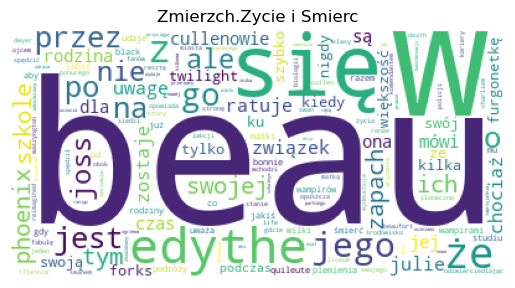

In [12]:
wordcloud = WordCloud(
    background_color = 'white',
    max_words = 5000,
    contour_width = 3,
    contour_color = 'steelblue'
)
if not os.path.exists("./chmury"):
    os.mkdir("./chmury")
for index, row in docs.iterrows():
    wordcloud.generate(row['content'])
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(index.replace(".txt", ""))
    plt.savefig("./chmury/{}".format(index.replace(".txt", ".png")))

5. Topic modelling

In [13]:
def plot_top_words(model, feature_names, n_top_words, title, subplots):
    fig, axes = plt.subplots(*subplots, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [14]:
n_components = 6
feature_names = count_vectorizer.get_feature_names_out
n_top_words = 20
subplots = (2,3)

In [15]:
nmf_kl = NMF(
    n_components=n_components,
    random_state=1,
    beta_loss='kullback-leibler',
    solver='mu',
    max_iter=1000,
    alpha_H=.00005,
    alpha_W=.00005,
    l1_ratio=.5
)
nmf_kl.fit(counts_tfidf)
plot_top_words(nmf_kl, feature_names, n_top_words, "Tematy w modelu NMF (KL)", subplots)

NameError: name 'counts_tfidf' is not defined